
Customer segmentation : is the method of distributing a customer base into collections of people based on mutual characteristics so organizations can market to group efficiently and competently individually.

The purpose of segmenting customers is to determine how to correlate to customers in multiple segments to maximize customer benefits. Perfectly done customer segmentation empowers marketers to interact with every customer in the best efficient approach.

The data includes the following features:

Customer ID

Customer Gender

Customer Age

Annual Income of the customer (in Thousand Dollars)

Spending score of the customer (based on customer behaviour and spending nature)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Checking for null values

In [ ]:
count=df.isnull().sum()
count

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Calculating mean value of age column for data

In [ ]:
mean_age=df['Age'].mean()

Filling null values with the mean of data if there any

In [ ]:
df["Age"].fillna(mean_age,inplace=True)

In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

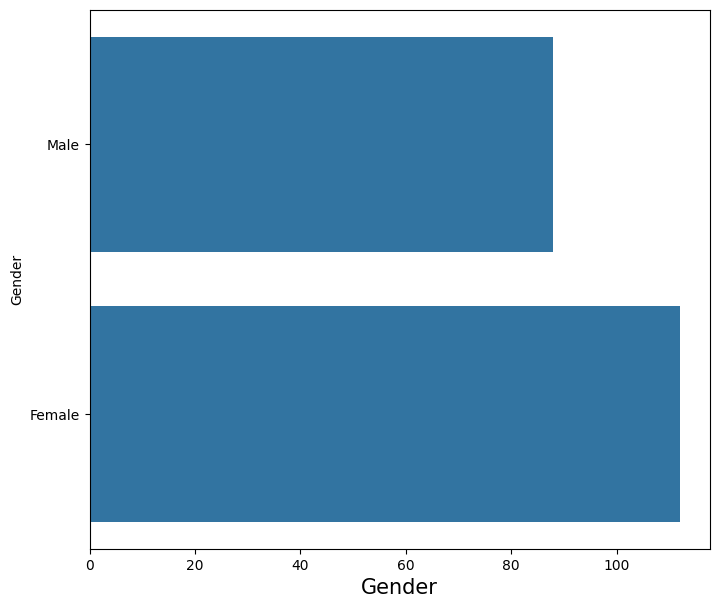

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(df["Gender"])
plt.xlabel("Gender",fontsize = 15)
plt.show()

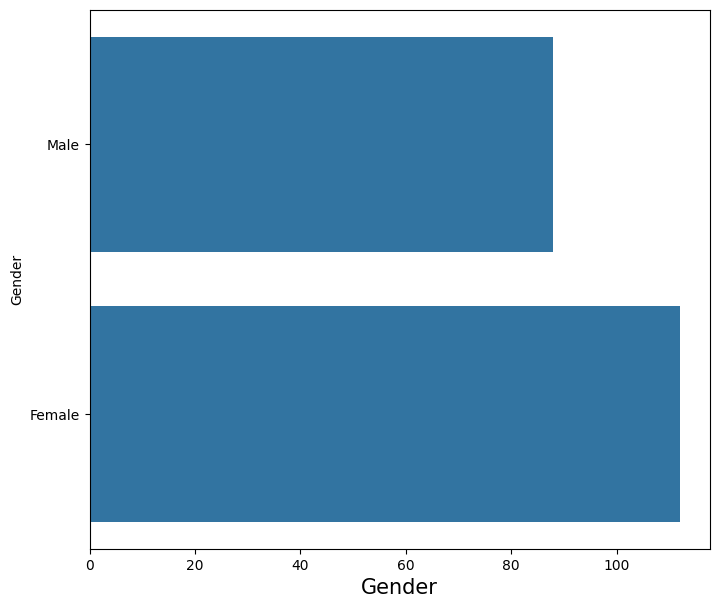

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(df["Gender"])
plt.xlabel("Gender",fontsize = 15)
plt.show()

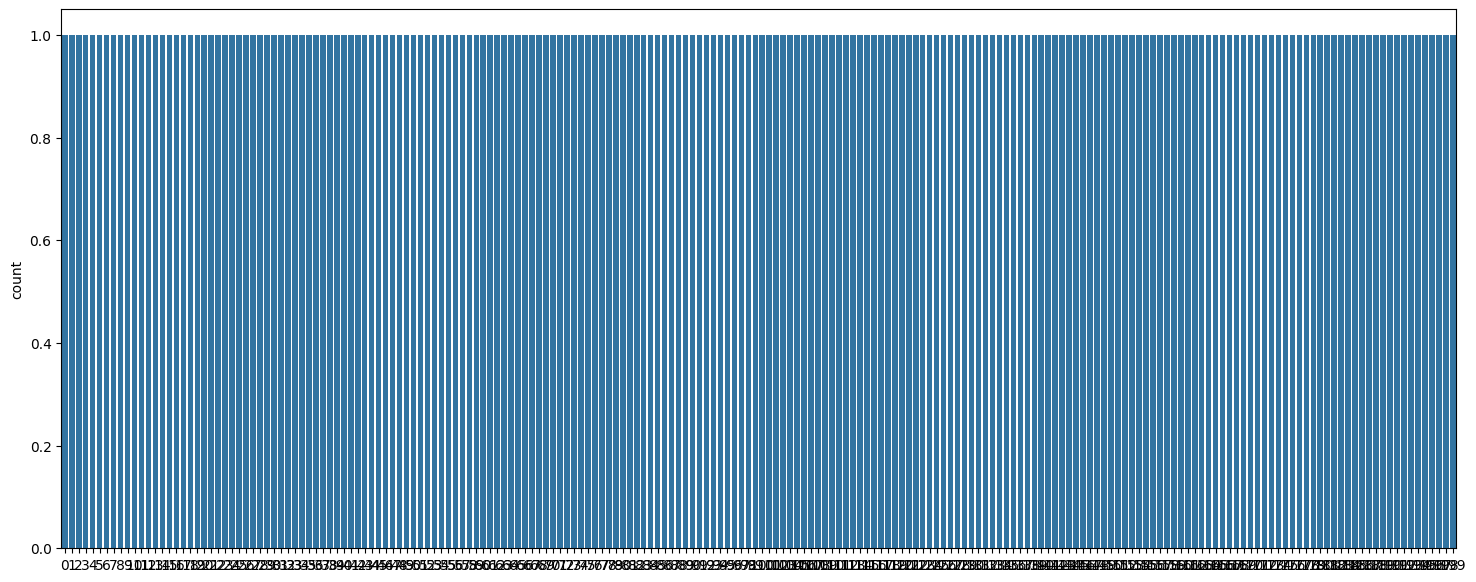

In [ ]:
plt.figure(figsize=(18,7))
sns.countplot(df["Age"])
plt.show()

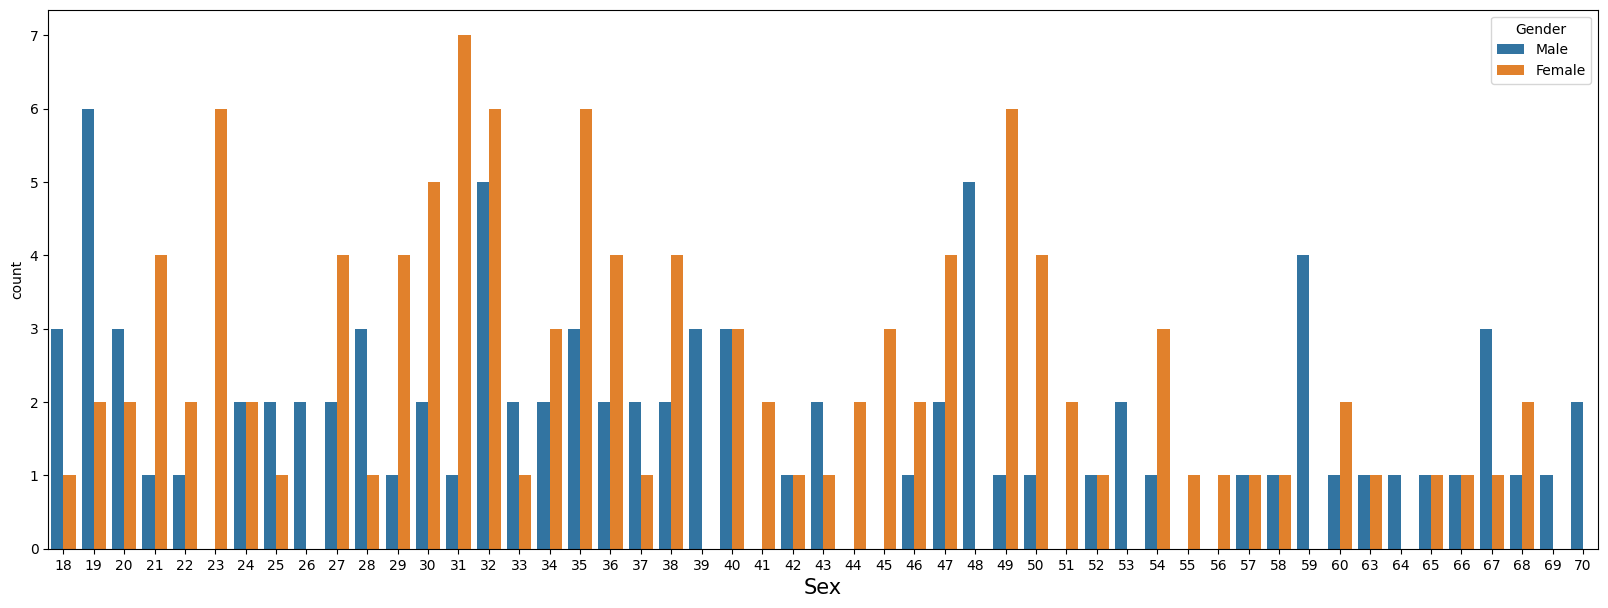

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,
              x = "Age",
              hue = "Gender")
plt.xlabel("Sex",fontsize = 15)
plt.show()

In [ ]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
# drop the CustomerID Column not required
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

In [ ]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


<ipython-input-20-4c33a4393e62>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color = "green")
<ipython-input-20-4c33a4393e62>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color = "green")
<ipython-input-20-4c33a4393e62>:7: UserWarning: 

`distplot` is a deprecated f

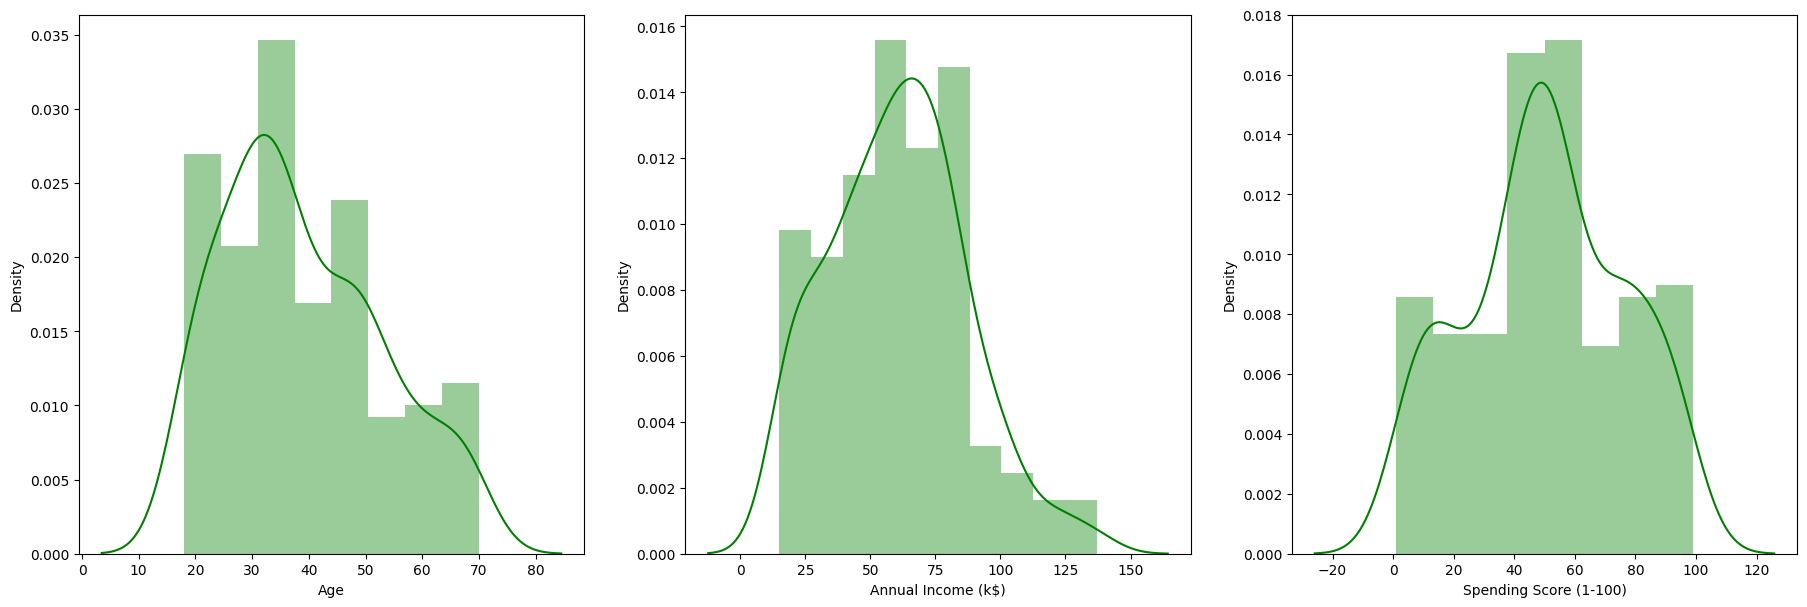

In [ ]:
plt.figure(figsize=(30,7))
plotnumber = 1

for column in df.iloc[:,1:]:
  if plotnumber <= 8:
    ax = plt.subplot(1,4,plotnumber)
    sns.distplot(df[column],color = "green")
    plt.xlabel(column)
  plotnumber+=1
plt.show()

In [ ]:
df['Annual Income (k$)'].loc[df['Gender']=='Female'].mean()

59.25

In [ ]:
df['Annual Income (k$)'].loc[df['Gender']=='Male'].mean()

62.22727272727273

In [ ]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


K-Means Clustering with Scikit-Learn
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data Labels for the training data (each data point is assigned to a single cluster)

For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps:

(i) Find the Euclidean distance between each data instance and centroids of all the clusters;

(ii) Assign the data instances to the cluster of the centroid with nearest distance;

(iii) Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.

A Simple Example
Let's try to see how the K-means algorithm works with the help of a handcrafted example, before implementing the algorithm in Scikit-Learn.

We have a set of the following two dimensional data instances named D.

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Here we are Majorly focused on Annual Income and Spending Score

In [ ]:
df.iloc[:,[2,3]].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
X = df.iloc[:,[2,3]].values

In [ ]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [ ]:
type(X)

numpy.ndarray

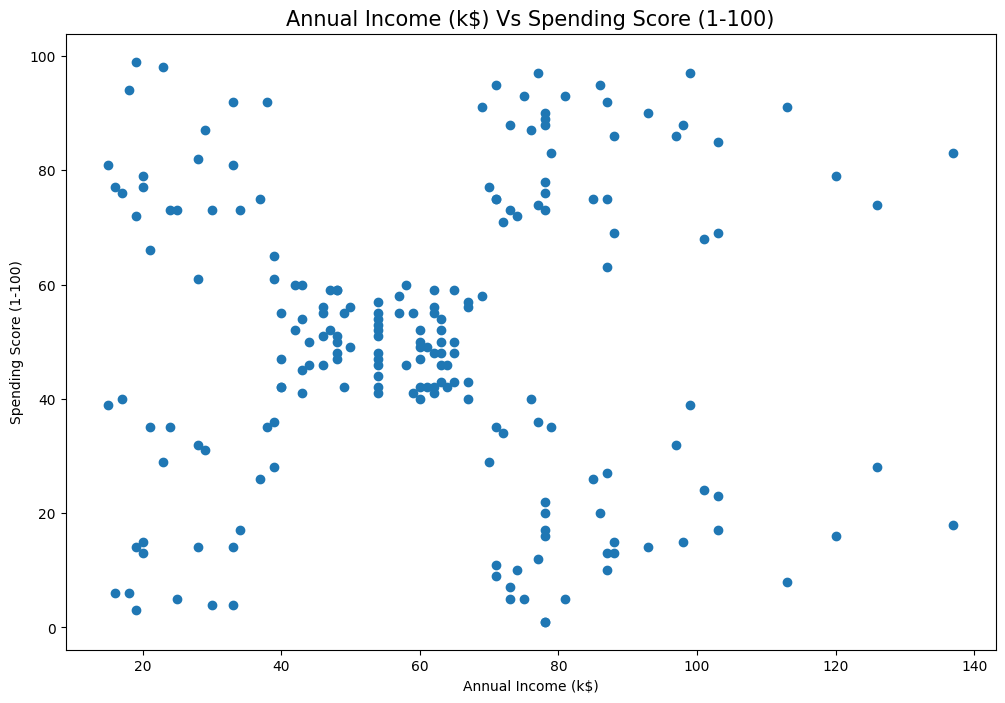

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) Vs Spending Score (1-100)",fontsize = 15)
plt.show()

Implementing KMeans Algorithm

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_) #no of centroids

[[79.6        50.12727273]
 [37.28888889 50.28888889]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


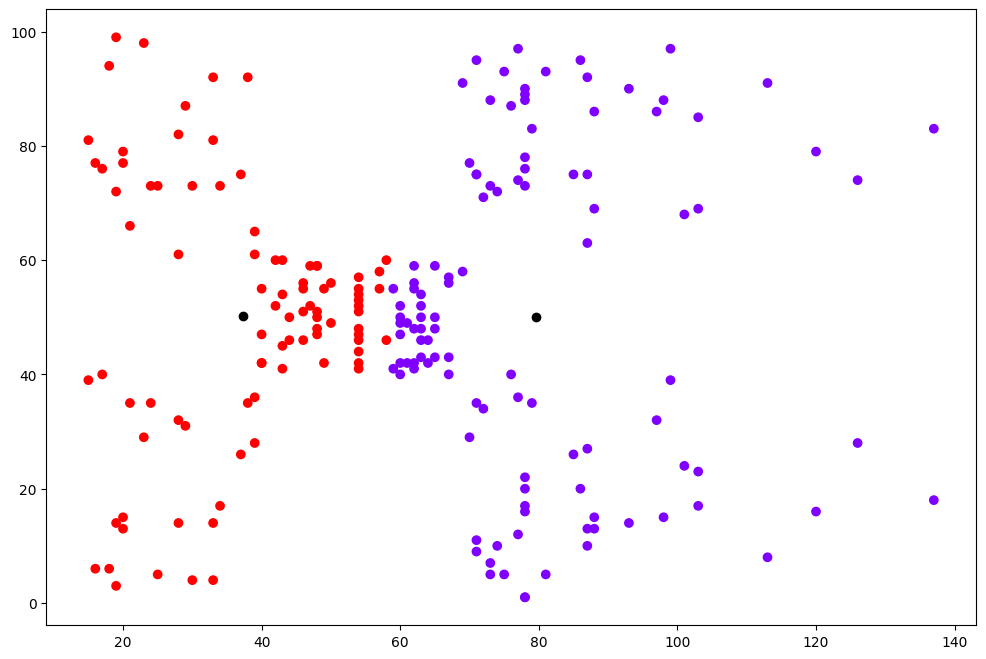

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


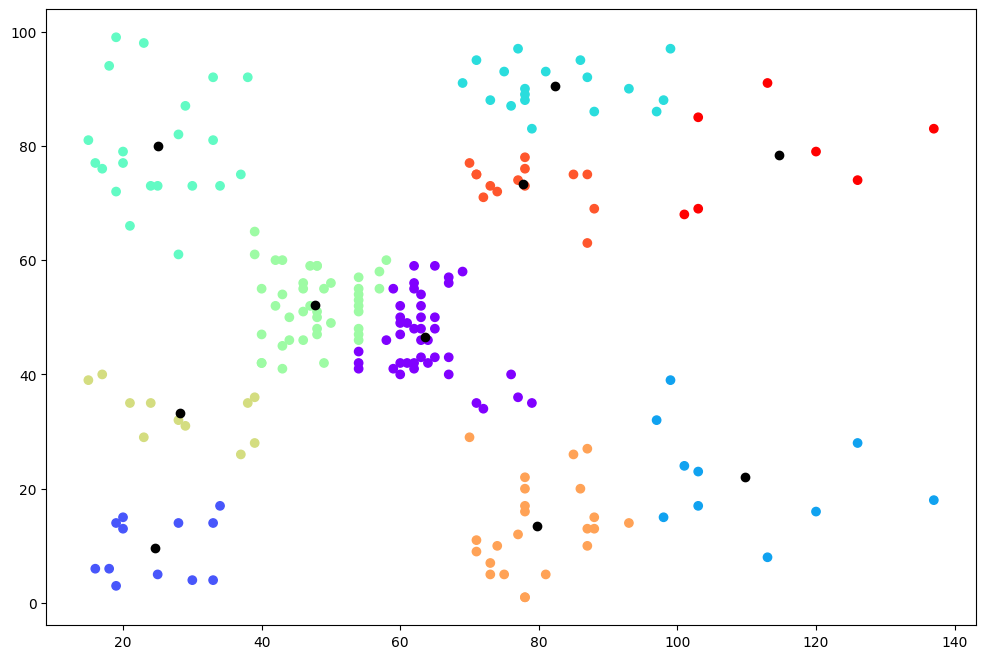

In [ ]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

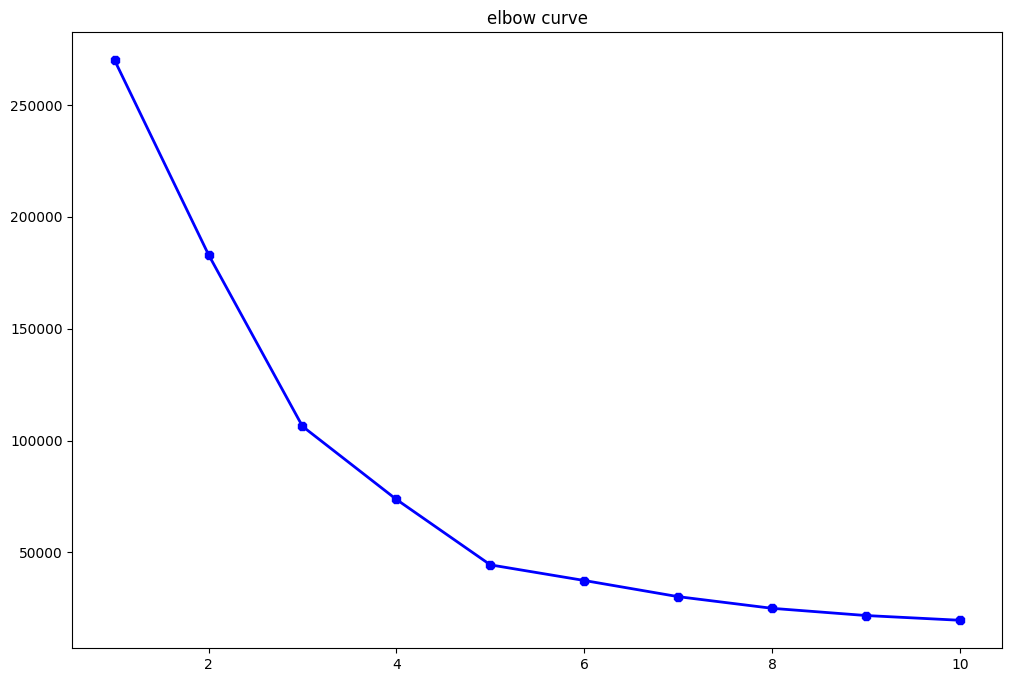

In [ ]:
plt.figure(figsize=(12,8))

wcss=[] # distortion # within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2, color="blue", marker ="8")
plt.title('elbow curve')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


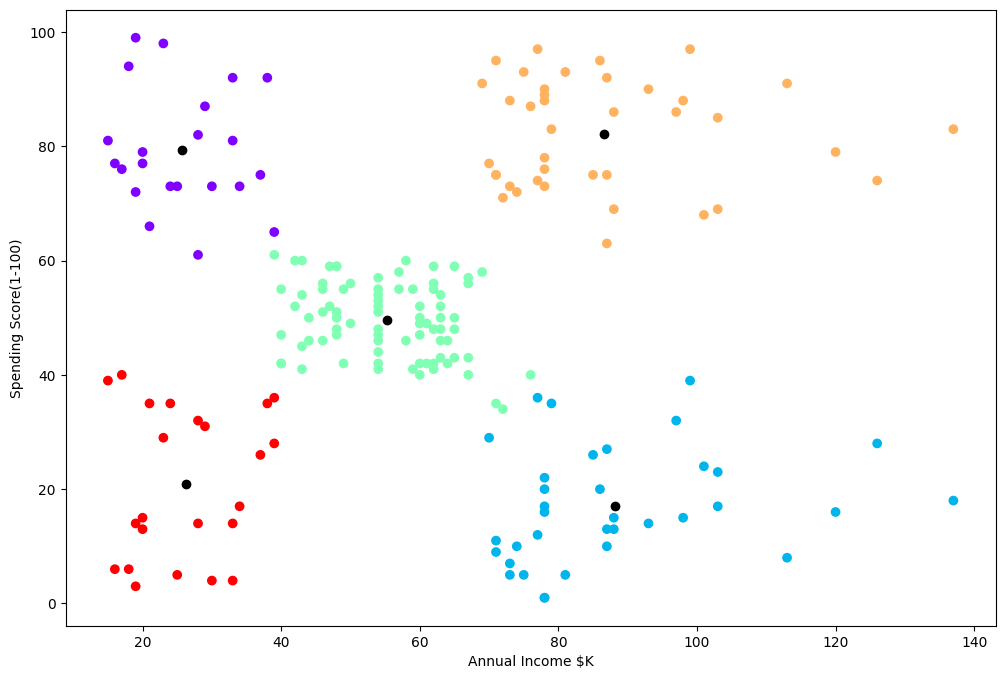

In [ ]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel('Annual Income $K')
plt.ylabel('Spending Score(1-100)')
plt.show()